In [1]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
import math
import time
import networkx as nx
import random
from tqdm import tqdm

In [2]:
from pycoingecko import CoinGeckoAPI

def get_token_price(token_id):
    cg = CoinGeckoAPI()
    try:
        token_info = cg.get_coin_by_id(token_id)
        usd_price = token_info['market_data']['current_price']['usd']
        return usd_price
    except Exception as e:
        print(f"Error: {e}")
        return None
  
token_id = 'weth'
usd_price = get_token_price(token_id)
if usd_price:
    print(f"The current price of {token_id.upper()} is ${usd_price:.2f} USD.")
else:
    print(f"Failed to retrieve the price for {token_id.upper()}.")

The current price of WETH is $2269.27 USD.


In [3]:
data = pd.read_csv("UniswapV2_daily_snapshot_sync_18012051_with_price.csv")
if data['price'].dtype != float:
    data['price'] = data['price'].astype(float)

/var/folders/n2/zyf9h_797rgbt4jbm0z8gz0c0000gn/T/ipykernel_35726/1738222474.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("UniswapV2_daily_snapshot_sync_18012051_with_price.csv")


In [4]:
# Sorting the data by 'reserveUSD' in descending order
#sorted_data = data.sort_values(by='reserveUSD', ascending=False)
#top_30_percent_index = int(len(sorted_data) * 0.3)
#sorted_data.head(top_30_percent_index)

data = data[data['reserveUSD'] > 1]
data

,block_number,timestamp,tx_hash,log_index,transactionIndex,token_contract_address,reserve0,reserve1,pair_contract_address1,createdAtBlockNumber,...,token0.name,token0.symbol,token1.decimals,token1.id,token1.name,token1.symbol,reserveUSD,reserve0_decimals,reserve1_decimals,price
0,17805146,2023-07-30T10:06:35,0x744997b8607cfbd66742557b46d59aa0b321d2341249...,140,99,0x00001bea43608c5ee487f82b773af8bd7cb20a6f,8904592433746249,11365669129991731,0x00001bea43608c5ee487f82b773af8bd7cb20a6f,17589578.0,...,Kabosu 2.0,KABOSU2.0,18.0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,WETH,42.710490,8.904592e+06,1.136567e-02,7.834640e+08
1,11771665,2021-02-01T17:27:18,0xbf22e8582a199797e42f8bdf909fb634529a5382ad21...,297,140,0x00004ee988665cdda9a1080d5792cecd16dc1220,199713907280830191521,40523599,0x00004ee988665cdda9a1080d5792cecd16dc1220,11666388.0,...,Solution Life Coin,SLC,6.0,0xdac17f958d2ee523a2206206994597c13d831ec7,Tether USD,USDT,81.005730,1.997139e+02,4.052360e+01,4.928336e+00
3,17307710,2023-05-21T12:21:35,0x3872ec27200dea5c87a2eff66967841cb0c48fb7e825...,229,128,0x0001810226ddd291b83f7f2892d21bdab7c6402e,55083412351436784,1814647566339413,0x0001810226ddd291b83f7f2892d21bdab7c6402e,16990356.0,...,Dejitaru Pyrra,PYRRA,18.0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,WETH,3.289387,5.508341e+07,1.814648e-03,3.035488e+10
4,17927387,2023-08-16T12:27:23,0x6f84f564f267faac5b4c378ce12838b696ab7650bc16...,34,6,0x0002b080a4378d0d6be8ff21a10f33d35ab20a8d,3303586905229376344282776953290,709547995426253925,0x0002b080a4378d0d6be8ff21a10f33d35ab20a8d,17206596.0,...,clown,CLOWN,18.0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,WETH,1294.695850,3.303587e+12,7.095480e-01,4.655903e+12
6,17988966,2023-08-25T03:15:47,0xba4d9b39c820023e0698f878d8012054aeca9c161124...,318,82,0x0002d2993bc95e2673429298da3902f6ffe11738,16179902463170537,9424818854853028,0x0002d2993bc95e2673429298da3902f6ffe11738,17737512.0,...,Wrapped Ether,WETH,9.0,0xd6c06168956ae2b4f745a9240bd2a9fd19403714,Lolita and Seven Dwarfs,LOLITA,53.743928,1.617990e-02,9.424819e+06,1.716734e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234030,16759450,2023-03-05T03:11:59,0x9accdaa2352aaf9c5535d49efd3bf4cd20d7d502aaff...,258,78,0xfffdd39d7f7eb982cac79197f1b0c2fb2a0742c2,8324162738160023,12123028061935320,0xfffdd39d7f7eb982cac79197f1b0c2fb2a0742c2,16489980.0,...,Mr.Shiba,Mr.Shiba,18.0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,WETH,37.931862,8.324163e+06,1.212303e-02,6.866406e+08
234033,17982857,2023-08-24T06:44:47,0x8b729a50b3b9412048e901bf9c4a4eb1042bc55f1569...,506,113,0xfffe214701719dfad4ad6e0887fd1511f7ce3419,197224824347864519792341,13228046545995497769,0xfffe214701719dfad4ad6e0887fd1511f7ce3419,17521845.0,...,CΔVΞ(DAO),CΔVΞ,18.0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,WETH,41711.673068,1.972248e+05,1.322805e+01,1.490960e+04
234037,16863068,2023-03-19T16:53:11,0xde74049e56db6a84f0fef5774ca0ff5ae2ae8a98d43c...,397,187,0xffff0a3e72953f8dc873ce64e421a210c03e619e,11958832512726398,1973473457015896260214674411,0xffff0a3e72953f8dc873ce64e421a210c03e619e,16863013.0,...,Wrapped Ether,WETH,18.0,0xe1c5009ed9323ea645bfca4e2d62c690d11771a0,Kodajuki Sozakki,KODAJUKI,43.715623,1.195883e-02,1.973473e+09,6.059789e-12
234038,17370219,2023-05-30T07:18:11,0x4a53bdc332a7e74049b0220efe59a73ac5f2fbea4aa8...,219,134,0xffff9f38605b53c99726efee1bfdcbe1ce0285a0,9076925904321,8624241265485830,0xffff9f38605b53c99726efee1bfdcbe1ce0285a0,17159542.0,...,good day,gd,18.0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,WETH,16.402630,9.076926e+03,8.624241e-03,1.052490e+06


In [5]:
if data['price'].dtype != float:
    data['price'] = data['price'].astype(float)

# Count the occurrences of each token0.id in token pairs
token0_occurrences = data['token0.id'].value_counts()

# Identify the token0.id that appears the most and its count
most_common_token0 = token0_occurrences.idxmax()
most_common_count = token0_occurrences.max()
# Count the occurrences| of each token0.id in token pairs
token0_occurrences = data['token0.id'].value_counts()

# Get the top 4 most common token0.id
top_four_common_tokens = token0_occurrences.head(4)

In [6]:
# Update the network creation function to ensure reserve data is in float type
def create_network_with_float_constraints(data):
    G = nx.DiGraph()
    for _, row in data.iterrows():
        # Convert reserves to float
        reserve0 = float(row['reserve0'])
        reserve1 = float(row['reserve1'])

        # Add vertices (tokens)
        G.add_node(row['token0.id'])
        G.add_node(row['token1.id'])

        # Add an edge from token0 to token1 with price and additional attributes
        forward_edge_attributes = {
            'price': row['price'],
            'reserve': reserve1,  # reserve of token1 for token0 to token1 edge
            'block_number': row['block_number'],
            'transactionIndex': row['transactionIndex'],
            'log_index': row['log_index']
        } 
        G.add_edge(row['token0.id'], row['token1.id'], **forward_edge_attributes)

        # Add the reverse edge from token1 to token0 with the inverse price
        reverse_edge_attributes = {
            'price': 1 / row['price'] if row['price'] != 0 else 0,
            'reserve': reserve0,  # reserve of token0 for token1 to token0 edge
            'block_number': row['block_number'],
            'transactionIndex': row['transactionIndex'],
            'log_index': row['log_index']
        }
        G.add_edge(row['token1.id'], row['token0.id'], **reverse_edge_attributes)

    return G

In [7]:
# Create the updated network with float type reserves
G = create_network_with_float_constraints(data)
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
num_nodes, num_edges

(63587, 131156)

In [8]:
# Finding all strongly connected components in the graph
strongly_connected_components = list(nx.strongly_connected_components(G))

# Identifying the largest strongly connected component
largest_component = max(strongly_connected_components, key=len)

# Creating a subgraph for the largest component
largest_component_subgraph = G.subgraph(largest_component)

# Number of nodes and edges in the largest strongly connected component
num_nodes_largest = largest_component_subgraph.number_of_nodes()
num_edges_largest = largest_component_subgraph.number_of_edges()

num_nodes_largest, num_edges_largest, len(strongly_connected_components)

(63536, 131104, 26)

In [9]:
# Counting the number of unique token pairs
unique_token_pairs = data[['token0.id', 'token1.id']].drop_duplicates()
num_unique_token_pairs = len(unique_token_pairs)

# Counting the number of unique tokens in token0.id and token1.id
unique_tokens_token0 = data['token0.id'].nunique()
unique_tokens_token1 = data['token1.id'].nunique()

num_unique_token_pairs, unique_tokens_token0, unique_tokens_token1

(65578, 47754, 16382)

In [10]:
# Count the occurrences of each token0.id in token pairs
token0_occurrences = data['token0.id'].value_counts()

# Identify the token0.id that appears the most and its count
most_common_token0 = token0_occurrences.idxmax()
most_common_count = token0_occurrences.max()
# Count the occurrences| of each token0.id in token pairs
token0_occurrences = data['token0.id'].value_counts()

# Get the top 4 most common token0.id
top_four_common_tokens = token0_occurrences.head(4)

most_common_token0, most_common_count
top_four_common_tokens

0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2    15348
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48      269
0x6b175474e89094c44da98b954eedeac495271d0f      185
0xdac17f958d2ee523a2206206994597c13d831ec7      138
Name: token0.id, dtype: int64

In [17]:
def calculate_slippage_and_check_reserve(price, amount, reserve):
    """
    Calculate the slippage and check if the amount is within the liquidity reserve.
    :param price: The price of the token.
    :param amount: The amount to be traded.
    :param reserve: The liquidity reserve.
    :return: The adjusted price considering slippage and a boolean indicating if the reserve is sufficient.
    """
    # Assuming a slippage model where slippage increases with the square of the amount (to a power of 2)
    # This is a simple model and may not accurately represent all liquidity pool mechanisms.
    slippage = (amount / reserve)**2
    adjusted_price = price * (1 + slippage)
    reserve_sufficient = amount <= reserve
    return adjusted_price, reserve_sufficient

In [18]:
def find_triangular_arbitrage_with_strict_constraints(G, start_token, max_initial_amount=1/2276):
    """
    Find triangular arbitrage opportunities with corrected constraints ensuring proper triangular paths.
    """
    arbitrage_opportunities = []

    # Loop over each pair of neighbors to start_token
    for token1 in G.neighbors(start_token):
        for token2 in G.neighbors(token1):
            if G.has_edge(token2, start_token):  # Check for a direct edge back to start_token
                
                # Get reserves and prices for each trade
                reserve_start_to_token1 = G[start_token][token1]['reserve']
                reserve_token1_to_token2 = G[token1][token2]['reserve']
                reserve_token2_to_start = G[token2][start_token]['reserve']
                price_start_to_token1 = G[start_token][token1]['price']
                price_token1_to_token2 = G[token1][token2]['price']
                price_token2_to_start = G[token2][start_token]['price']
                
                # Convert all reserves to start_token equivalent
                reserve_start_to_token1_in_start = reserve_start_to_token1 / price_start_to_token1
                reserve_token1_to_token2_in_start = reserve_token1_to_token2 * price_start_to_token1 / price_token1_to_token2
                reserve_token2_to_start_in_start = reserve_token2_to_start * price_start_to_token1 * price_token1_to_token2 / price_token2_to_start
                
                # Find the limiting reserve in start_token equivalent
                limiting_reserve_in_start = min(reserve_start_to_token1_in_start, 
                                                reserve_token1_to_token2_in_start, 
                                                reserve_token2_to_start_in_start)
                
                # Use the smaller of max_initial_amount and limiting_reserve_in_start as the initial amount
                initial_amount = min(max_initial_amount, limiting_reserve_in_start)

                # Calculate the effective prices considering slippage and check reserves
                price1, reserve_sufficient1 = calculate_slippage_and_check_reserve(
                    price_start_to_token1, initial_amount, reserve_start_to_token1)
                if not reserve_sufficient1:
                    continue  # Skip if reserve is not sufficient for the first trade

                amount_token1 = initial_amount / price1  # Amount of token1 that can be bought with initial_amount of start_token

                price2, reserve_sufficient2 = calculate_slippage_and_check_reserve(
                    price_token1_to_token2, amount_token1, reserve_token1_to_token2)
                if not reserve_sufficient2:
                    continue  # Skip if reserve is not sufficient for the second trade

                amount_token2 = amount_token1 / price2  # Amount of token2 that can be bought with amount_token1 of token1

                price3, reserve_sufficient3 = calculate_slippage_and_check_reserve(
                    price_token2_to_start, amount_token2, reserve_token2_to_start)
                if not reserve_sufficient3:
                    continue  # Skip if reserve is not sufficient for the third trade

                final_amount = amount_token2 / price3  # Final amount of start_token that can be bought with amount_token2 of token2

                if final_amount > initial_amount:  # Check for profitable arbitrage opportunity
                    arbitrage_amount = final_amount - initial_amount
                    details = {
                        'path': (start_token, token1, token2, start_token),
                        'arbitrage_amount': arbitrage_amount,
                        'details': {
                            'block_number': [
                                G[start_token][token1]['block_number'],
                                G[token1][token2]['block_number'],
                                G[token2][start_token]['block_number']
                            ],
                            'transactionIndex': [
                                G[start_token][token1]['transactionIndex'],
                                G[token1][token2]['transactionIndex'],
                                G[token2][start_token]['transactionIndex']
                            ],
                            'log_index': [
                                G[start_token][token1]['log_index'],
                                G[token1][token2]['log_index'],
                                G[token2][start_token]['log_index']
                            ]
                        }
                    }
                    arbitrage_opportunities.append(details)

    return arbitrage_opportunities

In [22]:
try:
    most_common_token0_arbitrage_opportunities_with_strict_constraints = find_triangular_arbitrage_with_strict_constraints(G, most_common_token0)
    # Display only the first 5 opportunities for brevity
    top_arbitrage_opportunities_strict_constraints = sorted(most_common_token0_arbitrage_opportunities_with_strict_constraints, 
                                                            key=lambda x: x['arbitrage_amount'], 
                                                            reverse=True)[50:150]
except Exception as e:
    top_arbitrage_opportunities_strict_constraints = f"Error encountered: {e}"

top_arbitrage_opportunities_strict_constraints

[{'path': ('0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
   '0xc00e94cb662c3520282e6f5717214004a7f26888',
   '0xd233d1f6fd11640081abb8db125f722b5dc729dc',
   '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'),
  'arbitrage_amount': 0.0060739942246600944,
  'details': {'block_number': [18010774, 15882324, 11166132],
   'transactionIndex': [139, 103, 70],
   'log_index': [409, 215, 140]}},
 {'path': ('0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
   '0x697ef32b4a3f5a4c39de1cb7563f24ca7bfc5947',
   '0xd46ba6d942050d489dbd938a2c909a5d5039a161',
   '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'),
  'arbitrage_amount': 0.005798808893598433,
  'details': {'block_number': [17960729, 11854337, 18011078],
   'transactionIndex': [50, 128, 104],
   'log_index': [88, 274, 340]}},
 {'path': ('0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
   '0xf29e46887ffae92f1ff87dfe39713875da541373',
   '0x2d80f5f5328fdcb6eceb7cacf5dd8aedaec94e20',
   '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'),
  'arbitrage_amount': 0.0

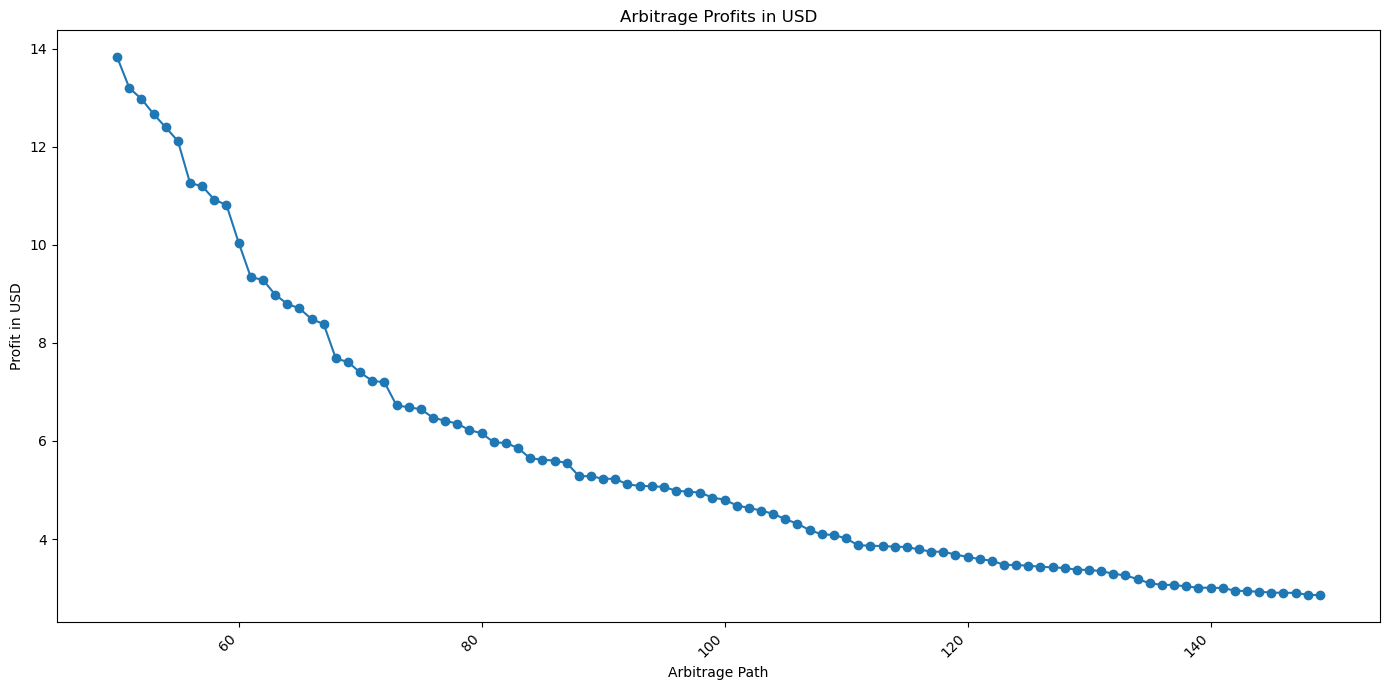

In [23]:
# Convert the arbitrage profits from WETH to USD, assuming 1 WETH = 2276 USD
arbitrage_profits_usd = [opportunity['arbitrage_amount'] * 2276 for opportunity in top_arbitrage_opportunities_strict_constraints]

# Create a line plot for the arbitrage profits in USD
plt.figure(figsize=(14, 7))
plt.plot(range(50,150),arbitrage_profits_usd, marker='o')

# Adding title and labels
plt.title('Arbitrage Profits in USD')
plt.xlabel('Arbitrage Path')
plt.ylabel('Profit in USD')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to fit the labels

# Display the plot
plt.show()